# Monday, March 10th

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Tartans

Let's get started working tartans by generating vertical and horizontal stripes for the following pattern (see project page for details):

B14 K6 B6 K6 B6 K32 OG32

where the colors B, K, and OG are given by:

B : [52, 80, 100], K : [16, 16, 16], OG : [92, 100, 40]

What is the total width of this pattern?

In [11]:
total_width = 14 + 6 + 6 + 6 + 6 + 32 + 32
print(total_width)

102


Let's initialize an array that has shape `(102, 102, 3)`.

In [12]:
vertical_stripes = np.zeros((102,102,3))

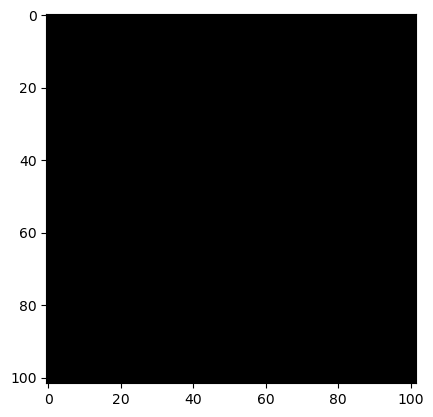

In [13]:
plt.imshow(vertical_stripes)

Right now, our array is a pure black picture. Let's add the first vertical stripe, which has color B = [52, 80, 100] and has width 14.

In [14]:
vertical_stripes[:, 0:14] = (52,80,100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..100.0].


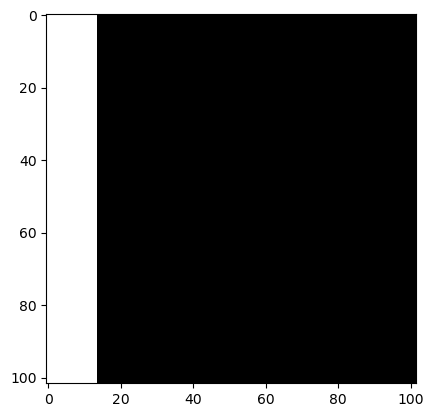

In [15]:
plt.imshow(vertical_stripes)

Note: `vertical_stripes` is an array of floating point data, so RGB information should be between `0` and `1`. We can either change `vertical_stripes` to be integer data and use integer RGB values (scaled between `0` and `255`), or rescale our RGB values to lie between `0` and `1`. For now, let's rescale to floats.

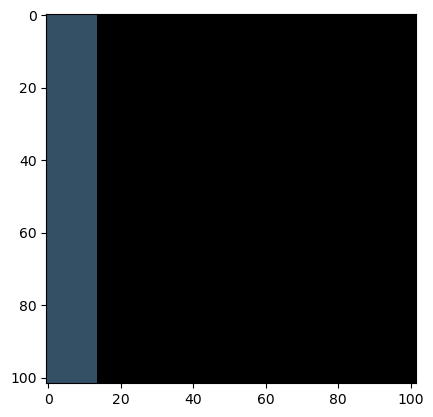

In [16]:
vertical_stripes[:, 0:14] = (52/255,80/255,100/255)

plt.imshow(vertical_stripes)

**Exercise:** Add the remaining stripes from our sample pattern to the `vertical_stripes` array:

B14 K6 B6 K6 B6 K32 OG32

B : [52, 80, 100], K : [16, 16, 16], OG : [92, 100, 40]

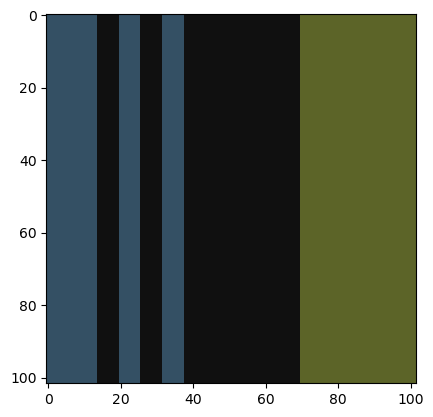

In [18]:
vertical_stripes = np.ones((102,102,3))
# Add the first stripe:
vertical_stripes[:, 0:14] = (52/255,80/255,100/255)
# Add the second stripe:
vertical_stripes[:,14:20] = (16/255, 16/255, 16/255)

# Add the rest of the stripes:
vertical_stripes[:,20:26] = (52/255, 80/255, 100/255)
vertical_stripes[:,26:32] = (16/255, 16/255, 16/255)
vertical_stripes[:,32:38] = (52/255, 80/255, 100/255)
vertical_stripes[:,38:70] = (16/255, 16/255, 16/255)
vertical_stripes[:,70:102] = (92/255, 100/255, 40/255)

plt.imshow(vertical_stripes)

Comments:
 - We need a much better way to generate this vertical stripes array. There was far too much manual typing/calculation to add each stripe. We'll come back and address this shortly.
 - Now that we have an array of vertical stripes, we can easily generate an array of horizontal stripes. This can be done using transposes (see below).
 - Once we have vertical and horizontal stripes, we need to super impose them somehow to generate the tartan pattern.

### Transposes

For a 2-dimensional matrix, the transpose flips rows and columns. In Python, we can use the `.T` method on a 2D array to get its transpose:

In [19]:
a = np.arange(25).reshape(5,5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [20]:
print(a.T)

[[ 0  5 10 15 20]
 [ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]]


We would like to take the transpose of our `vertical_stripes` array so that the columns of `vertical_stripes` become the rows of `horizontal_stripes`. 

**Problem:** The `vertical_stripes` array is a 3-dimensional array (rows, columns, color channels). What does `vertical_stripes.T` give us in this case?

In [23]:
vertical_stripes.shape

(102, 102, 3)

In [22]:
vertical_stripes.T.shape

(3, 102, 102)

It turns out that the `.T` method reverses the order of the axes. In this case, the color channel axis became the row axis, the column axis remained as the column axis, and the row axis became the color channel axis. For our purposes, this is not useful. Instead, we just want to swap the row and column axes.

We can use the `np.transpose` function to do more targeted transposing:

In [25]:
#help(np.transpose)

When using `np.transpose(vertical_stripes)`, we can optionally supply a keyword argument `axes`. In particular, using `axes = [1, 0, 2]` will give a transposed matrix where the old columns (axis `1`) become the new rows, the old rows (axis `0`) become the new columns, and the old color channel (axis `2`) remains as axis `2`.

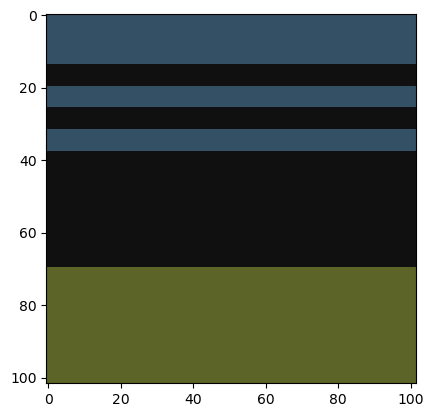

In [28]:
horizontal_stripes = np.transpose(vertical_stripes, axes=[1,0,2])

plt.imshow(horizontal_stripes)

We now have vertical and horizontal stripes. Can we combine them to get a tartan pattern?

One way to combine them is by taking the average:

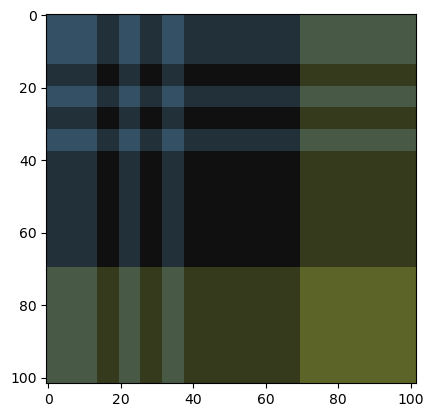

In [29]:
averaged_stripes = (vertical_stripes + horizontal_stripes) / 2

plt.imshow(averaged_stripes)

This gives flat colors rather than an interleaved combination. Can we instead generate a checkerboard pattern to interleave these stripes?

We want to go row by row, column by column, and alternatingly select a color from `vertical_stripes` and `horizontal_stripes`.

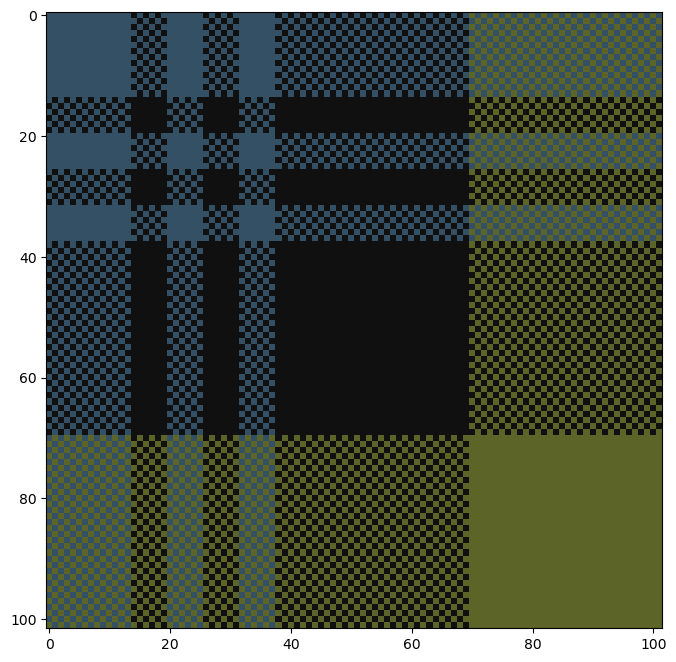

In [35]:
fig = plt.figure(figsize=(8,8))

checkerboard_tartan = np.zeros((102,102,3))

for i in range(102):
    for j in range(102):
        if (i + j) % 2 == 0:
            checkerboard_tartan[i,j] = vertical_stripes[i,j]
        else:
            checkerboard_tartan[i,j] = horizontal_stripes[i,j]
            
plt.imshow(checkerboard_tartan)

Where to go from here:
 - We need a better way of generating `vertical_stripes`.
 - We need to generate the more authentic tartan pattern described in the project page.
 - We need to pad our tartan pattern to be `500` by `500` rows/columns.